In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t]= wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6229 entries, 1995-01-03 to 2019-09-27
Data columns (total 4 columns):
PG      6229 non-null float64
MSFT    6229 non-null float64
F       6229 non-null float64
GE      6229 non-null float64
dtypes: float64(4)
memory usage: 243.3 KB


In [9]:
mydata.head()


,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.472425,2.428365,4.327944,4.082655
1995-01-04,8.404510,2.446017,4.444389,4.082655
1995-01-05,8.285657,2.405671,4.405572,4.092661
1995-01-06,8.302632,2.446017,4.405572,4.072646
1995-01-09,8.268674,2.430887,4.483203,4.032622


In [10]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-09-23,123.220001,139.139999,9.16,9.34
2019-09-24,123.610001,137.380005,9.11,8.97
2019-09-25,123.019997,139.360001,9.20,9.16
2019-09-26,124.309998,139.539993,9.14,9.02
2019-09-27,124.570000,137.729996,9.08,9.04


In [12]:
#iloc serve per estrarre i valori i-esimo da ogni colonna
mydata.iloc[0]


PG      8.472425
MSFT    2.428365
F       4.327944
GE      4.082655
Name: 1995-01-03 00:00:00, dtype: float64

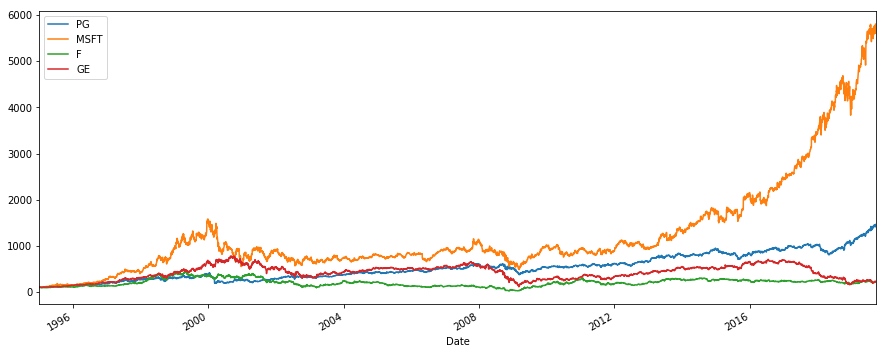

In [14]:
#normalizzo 
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));
plt.show()

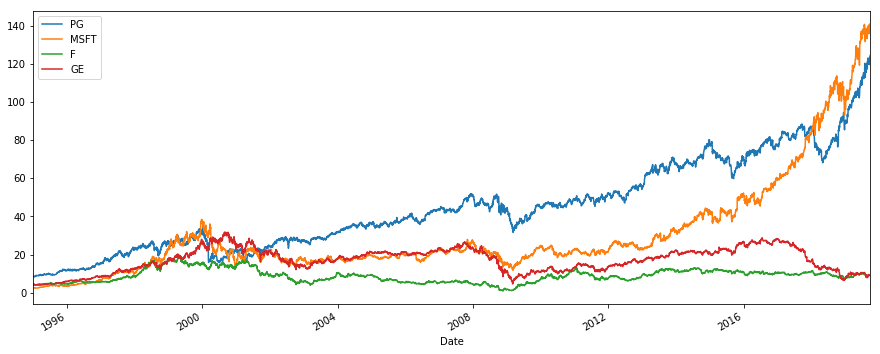

In [15]:
#se non normalizzo succede questo e non partono tutti dallo stesso punto
mydata.plot(figsize=(15,6));
plt.show();

In [18]:
#calcolare il ritorno del portafoglio
returns= (mydata/ mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [20]:
#diamo il 25% del peso per ogni azione
weights= np.array([0.25, 0.25, 0.25, 0.25])

In [22]:
#np.dot() fa calcoli tra matrici e vettori, moltiplico il ritorno per ogni peso 
np.dot(returns, weights)

array([        nan,  0.0065396 , -0.00922981, ...,  0.01017509,
       -0.00250695, -0.00380674])

In [23]:
annual_returns = returns.mean()*250
annual_returns

PG      0.132591
MSFT    0.210656
F       0.106747
GE      0.077117
dtype: float64

In [25]:
np.dot(annual_returns, weights)


0.13177772573825328

In [27]:
portafoglio1 =str(round(np.dot(annual_returns, weights),5)*100)+ ' %'
print(portafoglio1)

13.178 %
